# Endangered Species of U.S. National Parks
Perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or \
themes to the types of species that become endangered.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
species_data = pd.read_csv('species_info.csv')
observation_data = pd.read_csv('observations.csv')

### Exploring The Datasets

#### Column names

In [7]:
print(species_data.columns, observation_data.columns, sep='\n\n')

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


#### Datatype and Row count of columns

In [19]:
species_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [20]:
observation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


#### First 5 rows

In [10]:
species_data.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [11]:
observation_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Descriptive statistics of columns

In [21]:
species_data.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [22]:
observation_data.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


#### Count of conservation statuses grouped by species category

In [ ]:
species_data.groupby('category')['conservation_status'].value_counts(dropna=False)

category           conservation_status
Amphibian          NaN                      73
                   Species of Concern        4
                   Threatened                2
                   Endangered                1
Bird               NaN                     442
                   Species of Concern       72
                   Endangered                4
                   In Recovery               3
Fish               NaN                     116
                   Species of Concern        4
                   Threatened                4
                   Endangered                3
Mammal             NaN                     176
                   Species of Concern       28
                   Endangered                7
                   Threatened                2
                   In Recovery               1
Nonvascular Plant  NaN                     328
                   Species of Concern        5
Reptile            NaN                      74
                   Sp

In [ ]:
category_count_by_status = species_data.groupby('conservation_status')['category'].value_counts()

<Axes: xlabel='conservation_status'>

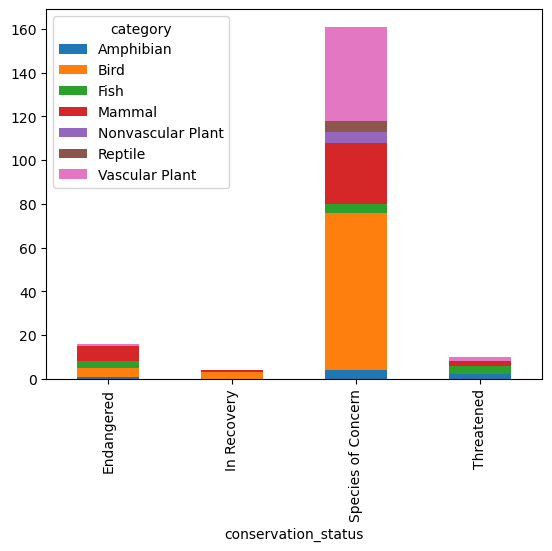

In [116]:
test2 = category_count_by_status.unstack()
# pd.DataFrame(category_count_by_status, index=multi_idx).plot(kind='bar',stacked=True)
test2.plot(kind='bar',stacked=True)

#### Count of scientific names grouped by park name

In [37]:
observation_data.groupby('park_name')['scientific_name'].value_counts()

park_name               scientific_name                    
Bryce National Park     Canis lupus                            3
                        Castor canadensis                      3
                        Columba livia                          3
                        Holcus lanatus                         3
                        Hypochaeris radicata                   3
                                                              ..
Yosemite National Park  Zonotrichia leucophrys gambelii        1
                        Zonotrichia leucophrys oriantha        1
                        Zonotrichia querula                    1
                        Zygodon viridissimus                   1
                        Zygodon viridissimus var. rupestris    1
Name: count, Length: 22164, dtype: int64

In [25]:
# species_data['conservation_status'].unique()
species_data.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
